# Importing Necessary Libraries

In [548]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

from pylab import rcParams

import os
os.chdir("C:\\Users\\tamil\\OneDrive\\Documents\\Python Directory")

folder = "Loan Prediction/"

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)


train = pd.read_csv(folder+"train.csv")
test_data = pd.read_csv(folder+"test.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Analysing Target Variable

In [549]:
target = train["Loan_Status"]

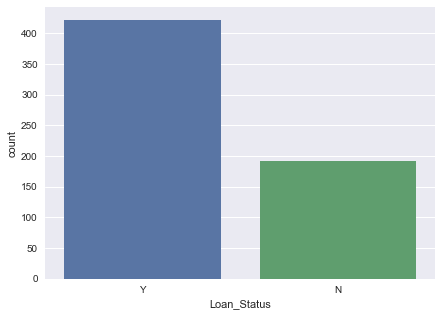

In [550]:
plt.figure(figsize=(7,5))
sns.countplot(target);

Cleary, it is an imbalanced dataset

# Basic Information On Data

In [551]:
train.shape

(614, 13)

In [552]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [553]:
print("Percentage of missing values")
print("============================")

for var in train.columns:
    if train[var].isna().sum() >0:
        miss = np.round(train[var].isna().sum()/train.shape[0] * 100,2)
        print(var, "has {0}% of missing values".format(miss))

Percentage of missing values
Gender has 2.12% of missing values
Married has 0.49% of missing values
Dependents has 2.44% of missing values
Self_Employed has 5.21% of missing values
LoanAmount has 3.58% of missing values
Loan_Amount_Term has 2.28% of missing values
Credit_History has 8.14% of missing values


# Extracting Numerical And Categorical Data

In [554]:
#Combining both train and tets data
df = train.drop("Loan_Status",axis = 1)
ntrain = df.shape[0]
data = pd.concat([df,test_data],ignore_index=True,axis = 0)

In [555]:
df = data.copy()
num_var = [var for var in df.columns if df[var].dtypes != 'object']
num_var

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [556]:
cat_var = [var for var in df.columns if df[var].dtypes == 'object']
cat_var

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

# Analysing Numerical Data

In [557]:
num_data = df[num_var]
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


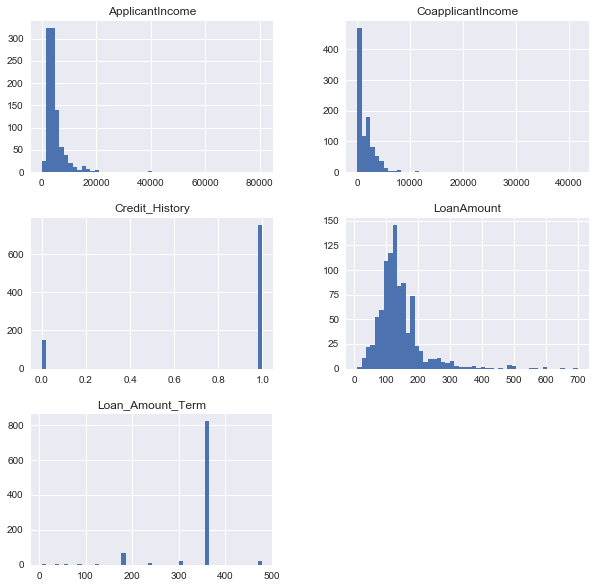

In [558]:
rcParams['figure.figsize'] = 10,10
num_data.hist(bins = 50);

Skewness is high

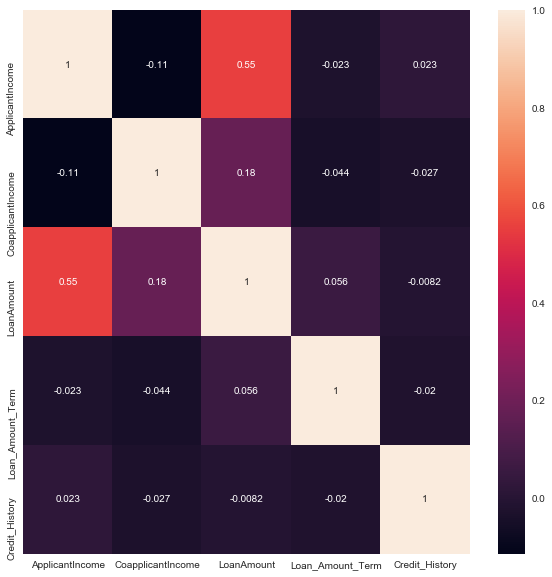

In [559]:
sns.heatmap(num_data.corr(), annot = True);

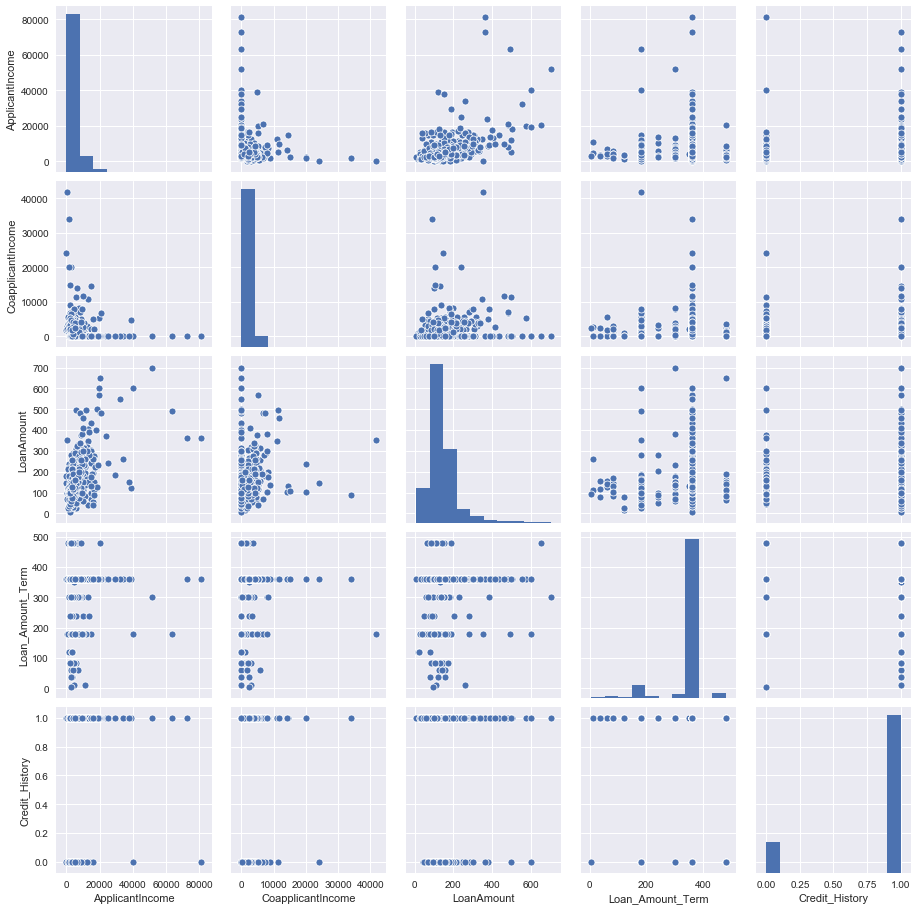

In [560]:
sns.pairplot(num_data);

No linearity in the data

## Feature Engineering

In [561]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [562]:
num_data.isnull().sum()/len(num_data) *100

ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           2.752294
Loan_Amount_Term     2.038736
Credit_History       8.053007
dtype: float64

In [563]:
num_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### Handling Missing Values

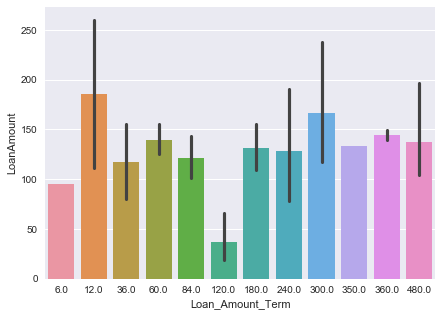

In [564]:
plt.figure(figsize=(7,5))
sns.barplot(x = "Loan_Amount_Term", y = "LoanAmount", data = num_data);

#### KNN Imputation

In [565]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer()
dt = knn_imputer.fit_transform(num_data)

In [566]:
num_data = pd.DataFrame(dt, columns = num_data.columns)
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,129.2,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0


In [567]:
num_data.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

### 1.Feature Creation

In [568]:
num_data["Loan_Amount_Term_Years"] = num_data["Loan_Amount_Term"]/12
num_data["Loan_Amount_Term_Years"] = num_data["Loan_Amount_Term_Years"].astype(int)

In [569]:
num_data["Loan_Percentage_From_Income"] = num_data["ApplicantIncome"]/num_data["LoanAmount"]

In [570]:
num_data["EMI"] = num_data["LoanAmount"]/num_data["Loan_Amount_Term"]

In [571]:
num_data["TotalIncome"] = num_data["ApplicantIncome"] + num_data["CoapplicantIncome"]

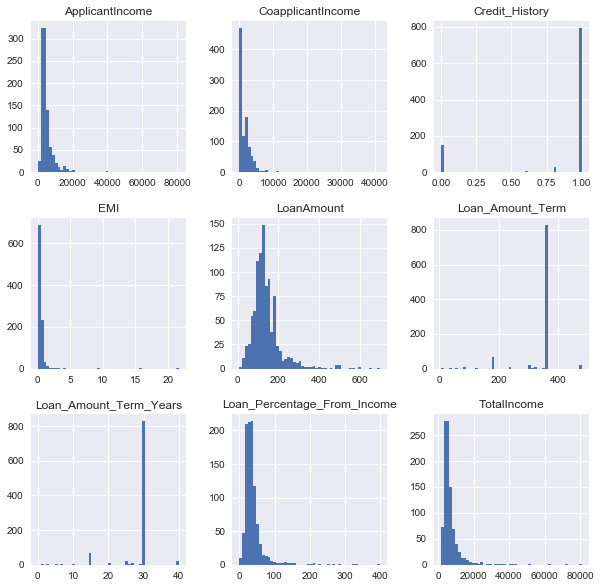

In [572]:
num_data.hist(bins = 50);

### Skew Correction

In [573]:
num_data["LoanAmount"].skew()

2.7047892386022276

In [574]:
from scipy.stats import skew
from scipy import stats
iy,l = stats.boxcox(num_data["LoanAmount"])
skew(iy)

0.02385552588969471

In [575]:
num_data["LoanAmount"] = iy

In [576]:
num_data["CoapplicantIncome"].skew()

6.844108581480271

In [577]:
iy,l = stats.yeojohnson(num_data["CoapplicantIncome"])
skew(iy)

-0.16626528669267088

In [578]:
num_data["CoapplicantIncome"] = iy

In [579]:
num_data["Loan_Percentage_From_Income"].skew()

5.3353748835758825

In [580]:
iy,l = stats.yeojohnson(num_data["Loan_Percentage_From_Income"])
skew(iy)

0.03303438575798984

In [581]:
num_data["Loan_Percentage_From_Income"] = iy

In [582]:
num_data["ApplicantIncome"].skew()

7.086961153594506

In [583]:
iy,l = stats.yeojohnson(num_data["ApplicantIncome"])
skew(iy)

0.3727665544288382

In [584]:
num_data["ApplicantIncome"] = iy

In [585]:
num_data["EMI"].skew()

16.926888986613793

In [586]:
iy,l = stats.yeojohnson(num_data["EMI"])
skew(iy)

0.08358315320063042

In [587]:
num_data["EMI"] = iy

In [588]:
num_data["TotalIncome"].skew()

6.042452559462701

In [589]:
iy,l = stats.boxcox(num_data["TotalIncome"])
skew(iy)

-0.04180198851079928

In [590]:
num_data["TotalIncome"] = iy

In [591]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Amount_Term_Years,Loan_Percentage_From_Income,EMI,TotalIncome
0,17.518513,0.000000,5.730645,360.0,1.0,30,4.067565,0.199469,1.891261
1,16.663240,9.480341,5.717793,360.0,1.0,30,3.811197,0.198499,1.891691
2,15.248387,0.000000,4.825376,360.0,1.0,30,4.072017,0.131765,1.882709
3,14.769364,10.225948,5.629117,360.0,1.0,30,3.267246,0.191774,1.889374
4,17.609668,0.000000,5.851408,360.0,1.0,30,3.999593,0.208522,1.891532


In [527]:
from sklearn.preprocessing import StandardScaler
temp = num_data.copy()
std = StandardScaler()
std_data = std.fit_transform(temp)
std_num_data = pd.DataFrame(std_data, columns = num_data.columns)
std_num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Amount_Term_Years,Loan_Percentage_From_Income,EMI,TotalIncome
0,0.508348,-1.117699,0.014609,0.277151,0.453097,0.27714,0.588095,-0.095107,0.185291
1,0.132815,0.738459,-0.005107,0.277151,0.453097,0.27714,0.172337,-0.115859,0.267079
2,-0.488419,-1.117699,-1.374085,0.277151,0.453097,0.27714,0.595316,-1.542668,-1.443930
3,-0.698749,0.884442,-0.141137,0.277151,0.453097,0.27714,-0.709805,-0.259630,-0.174300
4,0.548373,-1.117699,0.199860,0.277151,0.453097,0.27714,0.477864,0.098444,0.236914


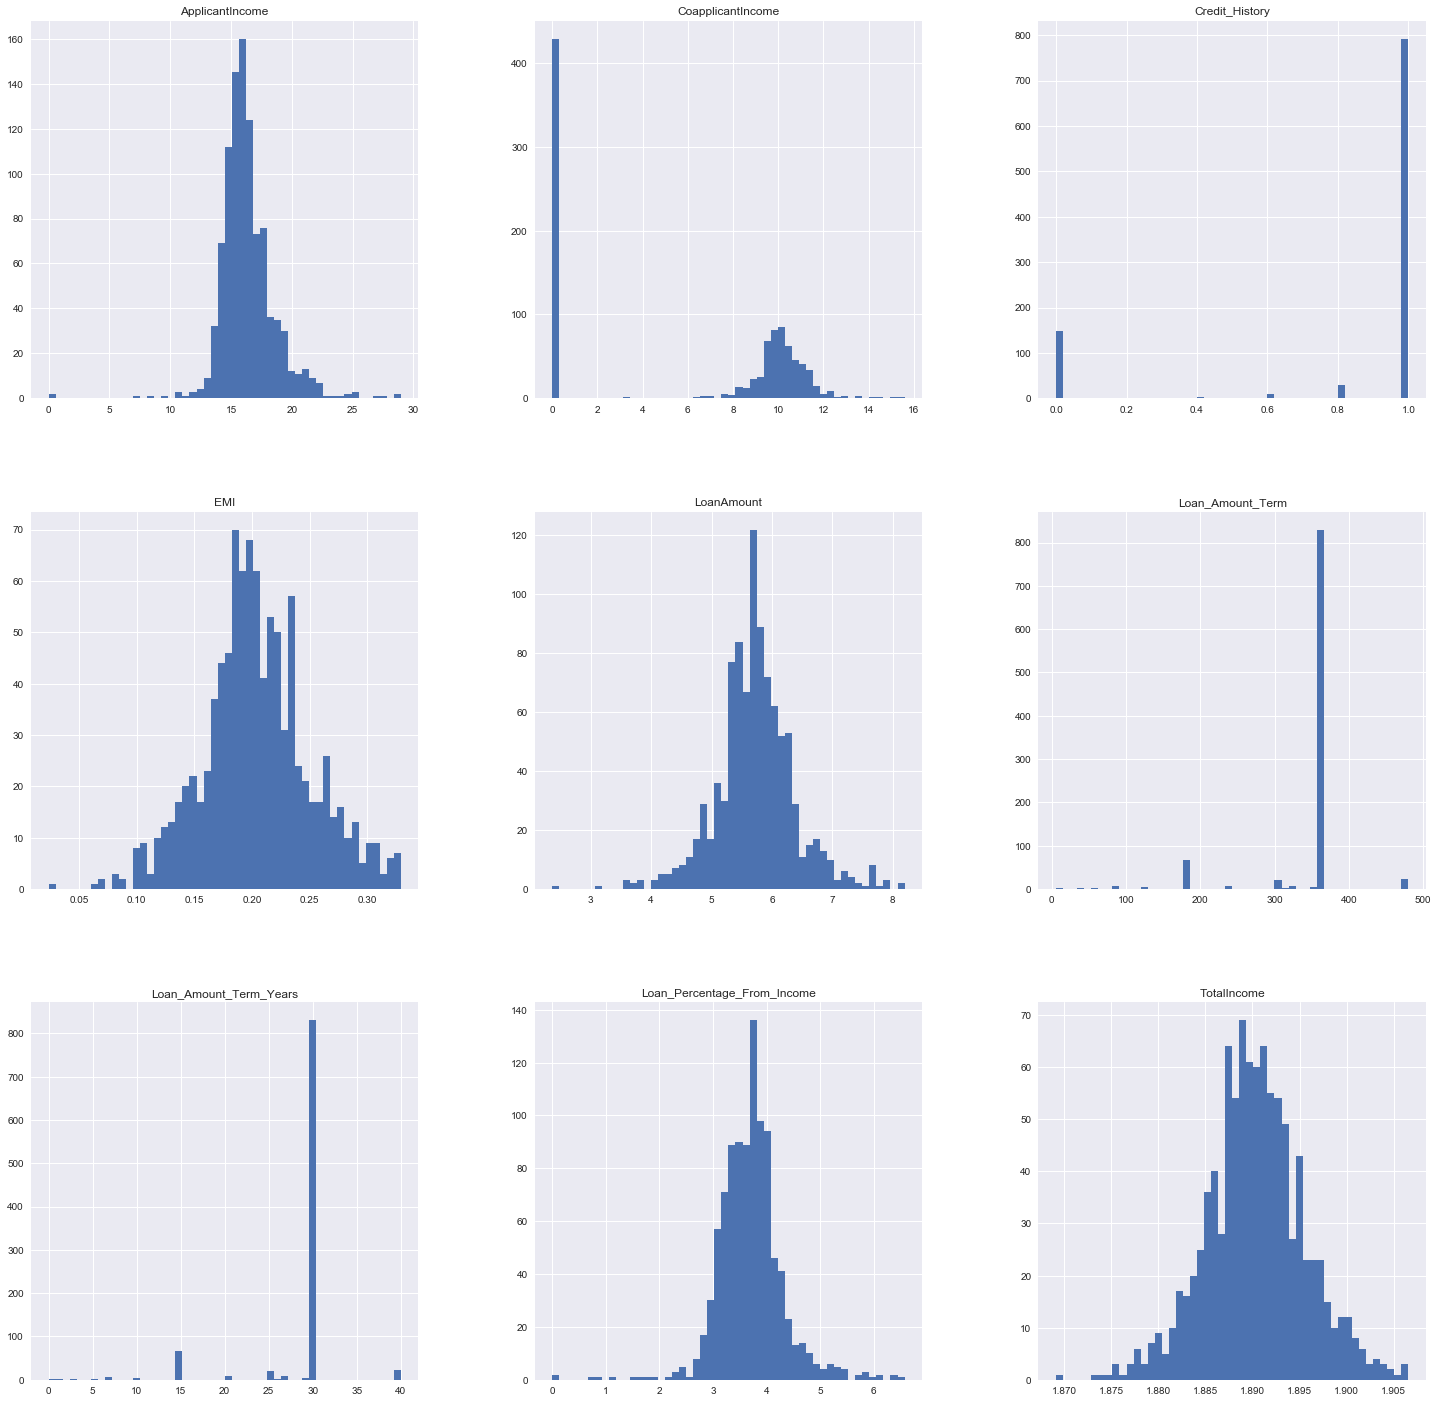

In [593]:
rcParams['figure.figsize'] = 25,25
num_data.hist(bins = 50);

# Analysing Categorical Variable

In [594]:
cat_data = df[cat_var]
cat_data = cat_data.drop(["Loan_ID"], axis = 1)
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban


In [595]:
for var in cat_data.columns:
    print("==========================")
    print(cat_data[var].value_counts())

Male      775
Female    182
Name: Gender, dtype: int64
Yes    631
No     347
Name: Married, dtype: int64
0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64
Graduate        763
Not Graduate    218
Name: Education, dtype: int64
No     807
Yes    119
Name: Self_Employed, dtype: int64
Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64


In [596]:
target = target.map({"Y":1,"N":0})

In [597]:
# for var in cat_data.columns:
#     plt.figure(figsize=(7,5))
#     sns.barplot(cat_data[var],target)
#     plt.show()

In [598]:
cat_data.isnull().sum()/len(cat_data) *100

Gender           2.446483
Married          0.305810
Dependents       2.548420
Education        0.000000
Self_Employed    5.606524
Property_Area    0.000000
dtype: float64

# Encoding 

In [599]:
cat_data_dummies = pd.get_dummies(cat_data, drop_first=True)
cat_data_dummies.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0,0,0,1
1,1,1,1,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,1
3,1,1,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,1


## Featture Engineering

### 1. Handling Missing Values

In [601]:
#KNN Imputation

knn = KNNImputer()
dt = knn.fit_transform(cat_data_dummies)

cat_data_dummies = pd.DataFrame(dt, columns = cat_data_dummies.columns)
cat_data_dummies.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# MODEL BUILDING

In [605]:
full_data = pd.concat([num_data,cat_data_dummies], axis = 1)
full_train = full_data[:ntrain]
full_test = full_data[ntrain:]

X = full_train
Y = target

#train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3)

In [608]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#prepare models
models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("RF", RandomForestClassifier()))
models.append(("SVM", SVC(gamma = "auto")))
models.append(("XGB", XGBClassifier()))


#evaluate each model with precision
seed = 7
results = []
names = []
# scoring = "precision"

for name, model in models:
    kfold = KFold(n_splits=5,random_state=seed)
    cv_results = cross_val_score(model,x_train,y_train,cv = kfold)
    results.append(cv_results)
    names.append(name)
    msg = [name,cv_results.mean(), cv_results.std()]
    print(msg)

['LR', 0.7994528043775649, 0.04538219933105857]
['LDA', 0.7971819425444596, 0.041435175863014505]
['KNN', 0.6807934336525308, 0.03467312304672408]
['CART', 0.7225444596443229, 0.06457849638082618]
['NB', 0.7832558139534884, 0.011143394000661331]
['RF', 0.7948837209302326, 0.029869012759074092]
['SVM', 0.7227633378932967, 0.037635425142322196]
['XGB', 0.7691928864569084, 0.019065350896887778]


# Taking XG BOOST

In [610]:
model = XGBClassifier()
model.fit(x_train,y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

from sklearn import metrics

print("Train Accuracy Score is {0}".format(metrics.accuracy_score(y_train,pred_train)))
print("Test Accuracy score is {0}".format(metrics.accuracy_score(y_test,pred_test)))
print("Precision Score is {0}".format(metrics.precision_score(y_test,pred_test)))
print("Recall Score is {0}".format(metrics.recall_score(y_test,pred_test)))
print("Classification Report\n",metrics.classification_report(y_test,pred_test))

Train Accuracy Score is 1.0
Test Accuracy score is 0.7081081081081081
Precision Score is 0.7941176470588235
Recall Score is 0.8059701492537313
Classification Report
               precision    recall  f1-score   support

           0       0.47      0.45      0.46        51
           1       0.79      0.81      0.80       134

    accuracy                           0.71       185
   macro avg       0.63      0.63      0.63       185
weighted avg       0.70      0.71      0.71       185



Model highly over fits the data

### Tuning XG BOOST

In [416]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
base_score = [0.25, 0.5, 0.75, 0.99]
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]
scale_pos_weight:[1,2,3,4]
colsample_bytree:[0.6,0.7,0.8,0.9]


hyperparameter_grid = {'n_estimators': n_estimators, 'max_depth': max_depth,
                       'learning_rate' : learning_rate, 'min_child_weight' : min_child_weight, 
                       'booster' : booster, 'base_score' : base_score
                      }

xgb_model = XGBClassifier()

xgb_cv = RandomizedSearchCV(estimator=xgb_model, param_distributions=hyperparameter_grid,
                               cv=5, n_iter=100,n_jobs =-1, iid=True,
                               verbose=1, return_train_score = True, random_state=42)
xgb_cv.fit(X,Y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           verbosity=None),
                   iid=True, n_iter=100, n_jobs=-1,
                   param_distributions={'base_score': [0.25, 0.5, 0.

In [417]:
xgb_cv.best_estimator_

XGBClassifier(base_score=0.25, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.15, max_delta_step=None, max_depth=2,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=0, scale_pos_weight=1, subsample=None,
              tree_method=None, validate_parameters=False, verbosity=None)

In [614]:
model = XGBClassifier(base_score=0.25, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.15, max_delta_step=None, max_depth=4,
              min_child_weight=2, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=0, scale_pos_weight=1, subsample=None,
              tree_method=None, validate_parameters=False, verbosity=None)
model.fit(x_train,y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

from sklearn import metrics

print("Train Accuracy Score is {0}".format(metrics.accuracy_score(y_train,pred_train)))
print("Test Accuracy score is {0}".format(metrics.accuracy_score(y_test,pred_test)))
print("Precision Score is {0}".format(metrics.precision_score(y_test,pred_test)))
print("Recall Score is {0}".format(metrics.recall_score(y_test,pred_test)))
print("Classification Report\n",metrics.classification_report(y_test,pred_test))

Train Accuracy Score is 0.8041958041958042
Test Accuracy score is 0.7945945945945946
Precision Score is 0.8076923076923077
Recall Score is 0.9402985074626866
Classification Report
               precision    recall  f1-score   support

           0       0.72      0.41      0.53        51
           1       0.81      0.94      0.87       134

    accuracy                           0.79       185
   macro avg       0.77      0.68      0.70       185
weighted avg       0.78      0.79      0.77       185



### LightGBM

In [620]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
               importance_type='split', learning_rate=0.01, max_depth=20,
               min_child_samples=4, min_child_weight=10, min_split_gain=0.02,
               n_estimators=1000, n_jobs=-1, num_leaves=600, objective='binary',
               random_state=None, reg_alpha=0.5, reg_lambda=0.05, silent=True,
               subsample=1, subsample_for_bin=50, subsample_freq=0, metric = 'f1',scale_pos_weight =2)

lgb.fit(x_train,y_train)
pred_train = lgb.predict(x_train)
pred_test = lgb.predict(x_test)

from sklearn import metrics

print("Train Accuracy Score is {0}".format(metrics.accuracy_score(y_train,pred_train)))
print("Test Accuracy score is {0}".format(metrics.accuracy_score(y_test,pred_test)))
print("Precision Score is {0}".format(metrics.precision_score(y_test,pred_test)))
print("Recall Score is {0}".format(metrics.recall_score(y_test,pred_test)))
print("Classification Report\n",metrics.classification_report(y_test,pred_test))

Train Accuracy Score is 0.8088578088578089
Test Accuracy score is 0.8162162162162162
Precision Score is 0.808641975308642
Recall Score is 0.9776119402985075
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.39      0.54        51
           1       0.81      0.98      0.89       134

    accuracy                           0.82       185
   macro avg       0.84      0.68      0.71       185
weighted avg       0.83      0.82      0.79       185



### Tuning Logistic Regression

In [616]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

log_reg = LogisticRegression()

grid_search_cv = GridSearchCV(log_reg, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, iid=True)
grid_search_cv.fit(X,Y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid=True, n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-0...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [617]:
grid_search_cv.best_estimator_

LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [618]:
model = LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

model.fit(x_train,y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

from sklearn import metrics

print("Train Accuracy Score is {0}".format(metrics.accuracy_score(y_train,pred_train)))
print("Test Accuracy score is {0}".format(metrics.accuracy_score(y_test,pred_test)))
print("Precision Score is {0}".format(metrics.precision_score(y_test,pred_test)))
print("Recall Score is {0}".format(metrics.recall_score(y_test,pred_test)))
print("Classification Report\n",metrics.classification_report(y_test,pred_test))

Train Accuracy Score is 0.8088578088578089
Test Accuracy score is 0.8
Precision Score is 0.8089171974522293
Recall Score is 0.9477611940298507
Classification Report
               precision    recall  f1-score   support

           0       0.75      0.41      0.53        51
           1       0.81      0.95      0.87       134

    accuracy                           0.80       185
   macro avg       0.78      0.68      0.70       185
weighted avg       0.79      0.80      0.78       185



### Tuning RF

In [114]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [310]:
# X_tb = X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Loan_Percentage_From_Income', 'EMI']]


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rccv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                          n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

rccv.fit(X,Y)

rccv.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.6min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [619]:
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
model.fit(x_train,y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

from sklearn import metrics

print("Train Accuracy Score is {0}".format(metrics.accuracy_score(y_train,pred_train)))
print("Test Accuracy score is {0}".format(metrics.accuracy_score(y_test,pred_test)))
print("Precision Score is {0}".format(metrics.precision_score(y_test,pred_test)))
print("Recall Score is {0}".format(metrics.recall_score(y_test,pred_test)))
print("Classification Report\n",metrics.classification_report(y_test,pred_test))

Train Accuracy Score is 0.8624708624708625
Test Accuracy score is 0.7675675675675676
Precision Score is 0.8053691275167785
Recall Score is 0.8955223880597015
Classification Report
               precision    recall  f1-score   support

           0       0.61      0.43      0.51        51
           1       0.81      0.90      0.85       134

    accuracy                           0.77       185
   macro avg       0.71      0.66      0.68       185
weighted avg       0.75      0.77      0.75       185



# SUBMISSION

In [338]:
full_test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Amount_Term_Years,Loan_Percentage_From_Income,EMI,TotalIncome,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
614,17.439034,0.000000,5.510159,360.0,1.0,30,4.220492,0.182705,1.891021,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
615,15.329495,9.471606,5.696120,360.0,1.0,30,3.400124,0.196859,1.888458,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
616,16.965082,9.772843,6.397114,360.0,1.0,30,3.383755,0.246736,1.892812,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
617,14.458857,10.356199,5.380636,360.0,1.0,30,3.355272,0.172822,1.889242,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
618,15.535046,0.000000,5.046787,360.0,1.0,30,3.985255,0.147736,1.884014,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [621]:
lgb = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
               importance_type='split', learning_rate=0.01, max_depth=20,
               min_child_samples=4, min_child_weight=10, min_split_gain=0.02,
               n_estimators=1000, n_jobs=-1, num_leaves=600, objective='binary',
               random_state=None, reg_alpha=0.5, reg_lambda=0.05, silent=True,
               subsample=1, subsample_for_bin=50, subsample_freq=0, metric = 'f1',scale_pos_weight =2)

lgb.fit(X,Y)
# model.fit(X,Y)
pred_train = lgb.predict(X)
print("Train Accuracy Score is {0}".format(metrics.accuracy_score(Y,pred_train)))

pred_sub = lgb.predict(full_test)

Train Accuracy Score is 0.8159609120521173


In [340]:
pred_sub[:10]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [341]:
def rev_encoder(x):
    if x == 1:
        return "Y"
    else:
        return "N"

In [342]:
submission = pd.read_csv(folder+"sample_submission.csv")
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [343]:
submission["Loan_Status"] = pred_sub
submission["Loan_Status"] = submission["Loan_Status"].apply(rev_encoder)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [344]:
submission.to_csv(folder+"submission.csv",index = False)
print("Submission is ready")

Submission is ready
